In [ ]:
# KUMKUM GUPTA 

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMDB DATASET

In [3]:
imdb_data = pd.read_csv('IMDB.csv')

In [4]:
imdb_data

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,Short,Sport,TalkShow,Thriller,War,Western,Column1,Column2,Column3,Column4
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,titles04/index.html.9989,tt0672488,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,http://www.imdb.com/title/tt0672488/,7.7,135,1440,2005,video.episode,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14757,titles04/index.html.9992,tt0675644,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,http://www.imdb.com/title/tt0675644/,7.3,8,5400,1957,video.episode,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14758,titles04/index.html.9994,tt0679222,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,http://www.imdb.com/title/tt0679222/,7,20,3600,1996,video.episode,...,0,0,1,0,0,0,NaN,NaN,NaN,NaN
14759,titles04/index.html.9995,tt0680064,Providence All the King's Men (TV Episode 2002),providence all the king s men tv episode,http://www.imdb.com/title/tt0680064/,NaN,NaN,3600,2002,video.episode,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
imdb_data.loc[64]  #one of datapoint where column mismatch is seen

fn                                                 titles01/tt0057012
tid                                                         tt0057012
title                                                    Dr. Seltsam\
wordsInTitle                                     oder wie ich lernte\
url                                        die Bombe zu lieben (1964)
imdbRating          dr seltsam oder wie ich lernte die bombe zu li...
ratingCount                      http://www.imdb.com/title/tt0057012/
duration                                                          8.6
year                                                           263157
type                                                             5700
nrOfWins                                                         1964
nrOfNominations                                           video.movie
nrOfPhotos                                                         13
nrOfNewsArticles                                                    4
nrOfUserReviews     

# Data Cleaning
**ISSUE**-Column mismatch<br>
**Observation in DATASET** - Column mismatch is occured due to '\\' in title naming , so after each '\\' , the entry is submitted to next column in csv file <br>
**Solution** - concatenate the full name with '\' in title column , and then rotate the array left side by 'x', x is calculated for a row as: the actual link index where link is present - ideal column index where link should present) (http format)

In [85]:
#5th column is http link format
# 3rd column is title column(problem occured here)
def modify(row):
    row_list = row.tolist()
    link_index = next((i for i, value in enumerate(row_list) if str(value).startswith('http')), None)
    if link_index is None:
        # If no 'http.' link is found, return the row as-is
        return row_list

     # Step 3: Calculate how much we need to rotate (left shift)
    # If link_index is already in the 10th column, no mismatch, so no rotation needed
    if link_index == 9:
        return row_list  # No changes required, return the row
    concatenated_value = ''
    for i in range(2, len(row_list)):
        if isinstance(row_list[i], str) and row_list[i].endswith('\\'):
            concatenated_value += row_list[i]  # Concatenate strings with slashes
        else: 
            concatenated_value += row_list[i]
            break
    row_list[2] = concatenated_value
    row_list[3:] = row_list[3+link_index-4:] # list rotation
    return row_list


imdb_cleaned = pd.DataFrame(imdb_data.apply(modify, axis = 1 ).tolist())

# Assign the original column names to the cleaned DataFrame
imdb_cleaned.columns = imdb_data.columns

# Drop unneccesary columns which we created in csv to avoid error while creating dataframe , i.e Column1 , Column2, Column3,Column4
imdb_cleaned.drop(['Column1' , 'Column2', 'Column3','Column4'],axis=1,inplace = True)

In [86]:
# Convert some suitable columns type to float64
imdb_cleaned[['imdbRating','ratingCount','duration','year','nrOfWins','nrOfNominations','nrOfPhotos','nrOfNewsArticles']]= imdb_cleaned[['imdbRating','ratingCount','duration','year','nrOfWins','nrOfNominations','nrOfPhotos','nrOfNewsArticles']].astype('float64')

In [87]:
imdb_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fn                14761 non-null  object 
 1   tid               14761 non-null  object 
 2   title             14761 non-null  object 
 3   wordsInTitle      14748 non-null  object 
 4   url               14761 non-null  object 
 5   imdbRating        13551 non-null  float64
 6   ratingCount       13551 non-null  float64
 7   duration          13745 non-null  float64
 8   year              14731 non-null  float64
 9   type              14761 non-null  object 
 10  nrOfWins          14761 non-null  float64
 11  nrOfNominations   14761 non-null  float64
 12  nrOfPhotos        14761 non-null  float64
 13  nrOfNewsArticles  14761 non-null  float64
 14  nrOfUserReviews   14761 non-null  int64  
 15  nrOfGenre         14761 non-null  int64  
 16  Action            14761 non-null  int64 

<span style="color: red;">**Question 7**<br>Get the imdb rating for fifth movie of dataframe

In [88]:
# Rating column is at 5th index
# '5th' movie will be at '4th' index
imdb_cleaned.loc[4]['imdbRating']

8.7

<span style="color: red;">**Question 8**<br> Return titles of movies with shortest and longest run time

In [89]:
# Minimum runtime

# Get the row having minimum duration
min_runtime_row = imdb_cleaned.loc[imdb_cleaned['duration'].idxmin()]
# Extract title
shortest_runtime_movie = min_runtime_row['wordsInTitle']
print(f"This is movie title with shortest runtime-- {shortest_runtime_movie}")

# Maximum runtime

# Get the row having maximum duration
max_runtime_row = imdb_cleaned.loc[imdb_cleaned['duration'].idxmax()]
# Extract title
longest_runtime_movie = max_runtime_row['wordsInTitle']
print(f"This is movie title with longest runtime-- {longest_runtime_movie}")


This is movie title with shortest runtime-- traffic crossing leeds bridge
This is movie title with longest runtime-- baseball the national pastime tv episode


<span style="color: red;">**Question 9**<br> Sort the data frame by in the order of when they where released and have higer ratings, Hint : release_date (earliest) and Imdb rating(highest to lowest)

In [90]:
# Drop datapoints where year is missing value as only 30 datapoints out of 14761
imdb_cleaned = imdb_cleaned.dropna(subset=['year'])
imdb_cleaned['year'] = imdb_cleaned['year'].astype(int)  # Convert float to integer


In [91]:
sorted_df = imdb_cleaned.sort_values(by=['year', 'imdbRating'], ascending=[True, False])
sorted_df


,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
14013,titles04/index.html.8647,tt0392728,Roundhay Garden Scene (1888),roundhay garden scene,http://www.imdb.com/title/tt0392728/,7.8,2931.0,NaN,1888,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
13682,titles04/index.html.8070,tt0343112,Traffic Crossing Leeds Bridge (1888),traffic crossing leeds bridge,http://www.imdb.com/title/tt0343112/,7.2,1442.0,2.0,1888,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
14125,titles04/index.html.8877,tt0416046,Monkeyshines\ No. 2 (1890),monkeyshines no,http://www.imdb.com/title/tt0416046/,5.4,383.0,NaN,1890,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
6909,titles04/index.html,tt0000005,Blacksmith Scene (1893),blacksmith scene,http://www.imdb.com/title/tt0000005/,6.3,1039.0,60.0,1893,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
12691,titles04/index.html.6501,tt0177707,Dickson Experimental Sound Film (1894),dickson experimental sound film,http://www.imdb.com/title/tt0177707/,6.8,965.0,22.0,1894,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,titles04/index.html.14081,tt2458948,Evangerion shin gekijoban (2015),evangerion shin gekijoban,http://www.imdb.com/title/tt2458948/,NaN,NaN,NaN,2015,video.movie,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
9432,titles04/index.html.14286,tt2967214,Vexille (2015),vexille,http://www.imdb.com/title/tt2967214/,NaN,NaN,NaN,2015,video.movie,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
9507,titles04/index.html.14426,tt3322312,Daredevil (TV Series 2015– ),daredevil tv series,http://www.imdb.com/title/tt3322312/,NaN,NaN,NaN,2015,video.tv,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
14305,titles04/index.html.9154,tt0439572,The Flash (2016),the flash,http://www.imdb.com/title/tt0439572/,NaN,NaN,NaN,2016,video.movie,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


<span style="color: red;">**Question 10**<br> Subset the dataframe with movies having the following prameters.
 duration between 30 mintues to 180 minutes

In [92]:
subset_duration_imdb = imdb_cleaned[(imdb_cleaned['duration']>=30) & (imdb_cleaned['duration']<=180)]
subset_duration_imdb

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
949,titles02/index.html.3068,tt3265732,Words with Warwick Kathleen Kennedy (TV Episod...,words with warwick kathleen kennedy tv episode,http://www.imdb.com/title/tt3265732/,NaN,NaN,180.0,2013,video.episode,...,0,0,0,0,0,0,1.0,0.0,0.0,0.0
1362,titles02/index.html.4822,tt3297996,The Twenty-Eight Hits for Laughs Who the Hell ...,the twenty eight hits for laughs who the hell ...,http://www.imdb.com/title/tt3297996/,7.3,10.0,60.0,2011,video.episode,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2519,titles03/index.html.1911,tt0091455,Die kleine Lampe (1986),die kleine lampe,http://www.imdb.com/title/tt0091455/,7.5,5793.0,120.0,1986,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
3377,titles03/index.html.3047,tt0191831,Bigfoot (1967),bigfoot,http://www.imdb.com/title/tt0191831/,7.3,198.0,60.0,1967,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
3835,titles03/index.html.3630,tt0331560,Lord of the Piercing (TV Short 2002),lord of the piercing tv short,http://www.imdb.com/title/tt0331560/,7.7,2162.0,180.0,2002,video.tv,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
4010,titles03/index.html.3854,tt0373262,Recruiting a Digital Army (Video 2000),recruiting a digital army video,http://www.imdb.com/title/tt0373262/,NaN,NaN,60.0,2000,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
4074,titles03/index.html.3930,tt0384784,(Ohne Titel) (2003),ohne titel,http://www.imdb.com/title/tt0384784/,6.3,6.0,180.0,2003,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
5578,titles03/index.html.5718,tt1443387,Cavalcade of Cartoon Comedy Things You Never H...,cavalcade of cartoon comedy things you never h...,http://www.imdb.com/title/tt1443387/,6.6,15.0,120.0,2009,video.episode,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5584,titles03/index.html.5723,tt1447181,My Left Sock (2003),my left sock,http://www.imdb.com/title/tt1447181/,NaN,NaN,120.0,2003,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
5685,titles03/index.html.5837,tt1549133,Un Parisien à New York (2007),un parisien new york,http://www.imdb.com/title/tt1549133/,NaN,NaN,120.0,2007,video.movie,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0


# <span style="color: blue;">  BONUS QUESTION - IMDB

<span style="color: red;"> **Bonus Question 1** <br> Generate a report that tracks the various Genere combinations for each type year on year. The result data frame should contain type, Genere_combo, year,
 avg_rating, min_rating, max_rating, total_run_time_mins

In [93]:
# Custom function to concatenate genres into a string
def create_genre_combo(row):
    #  'genre_columns' are the relevant columns
    genre_columns = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'FilmNoir', 'GameShow', 'History','Horror','Music','Musical','Mystery','News','RealityTV','Romance','SciFi','Short','Sport','TalkShow','Thriller','War','Western']
    genre_list = [genre for genre in genre_columns if row[genre] == 1]
    return ','.join(genre_list)

# Apply the custom function to each row to create the 'Genere_combo' column
imdb_cleaned['Genre_combo'] = imdb_cleaned.apply(create_genre_combo, axis=1)
report_genre_combo = imdb_cleaned.groupby(['year','type', 'Genre_combo']).agg(
    avg_rating=('imdbRating', 'mean'),    # Average IMDB rating
    min_rating=('imdbRating', 'min'),     # Minimum IMDB rating
    max_rating=('imdbRating', 'max'),     # Maximum IMDB rating
    total_run_time_mins=('duration', 'sum') , # Total runtime in minutes
    tot_movie = ('year','size')
).reset_index()
report_genre_combo


,year,type,Genre_combo,avg_rating,min_rating,max_rating,total_run_time_mins,tot_movie
0,1888,video.movie,"Documentary,Short",7.5,7.2,7.8,2.0,2
1,1890,video.movie,Short,5.4,5.4,5.4,0.0,1
2,1893,video.movie,Short,6.3,6.3,6.3,60.0,1
3,1894,video.movie,Short,6.8,6.8,6.8,22.0,1
4,1899,video.movie,"Comedy,Romance,Short",5.9,5.9,5.9,60.0,1
...,...,...,...,...,...,...,...,...
7850,2015,video.movie,Horror,NaN,NaN,NaN,0.0,1
7851,2015,video.movie,SciFi,NaN,NaN,NaN,0.0,1
7852,2015,video.tv,"Action,SciFi",NaN,NaN,NaN,0.0,1
7853,2016,video.movie,"Action,Adventure,Drama",NaN,NaN,NaN,0.0,1


<span style="color: red;">**Bonus Question 2** <br>  Is there a relation between the length of a movie title and the ratings?

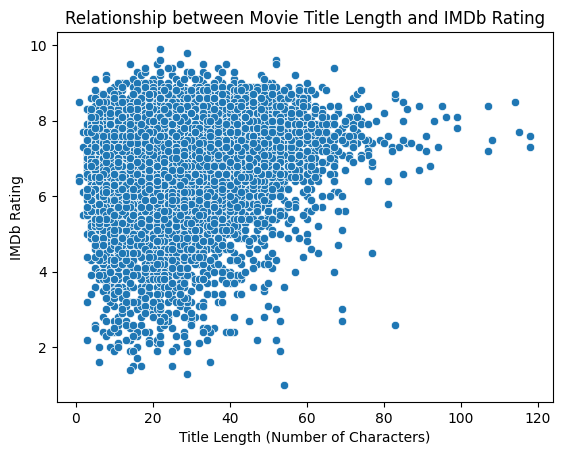

Correlation between title length and IMDb rating: 0.10803953120088486


In [94]:
# Convert title in str object to ensure NaN not create problem while calculating len()
imdb_cleaned['wordsInTitle'] = imdb_cleaned['wordsInTitle'].astype(str)

# new column 'title_length' that has length of the movie titles
imdb_cleaned['title_length'] = imdb_cleaned['wordsInTitle'].apply(len)

# Plot the relationship between title length and IMDb rating
sns.scatterplot(x='title_length', y='imdbRating', data=imdb_cleaned)
plt.title('Relationship between Movie Title Length and IMDb Rating')
plt.xlabel('Title Length (Number of Characters)')
plt.ylabel('IMDb Rating')
plt.show()

# Calculate the correlation between title length and IMDb rating
correlation = imdb_cleaned['title_length'].corr(imdb_cleaned['imdbRating'])
print(f"Correlation between title length and IMDb rating: {correlation}")

<span style="color: red;">**Bonus Question 3** <br> Generate a report that captures the trend of the number of letters in movies titles over years. We expect a cross tab between the year of the video release and
 the quantile that length fall under. The results should contain year, min_length, max_length, num_videos_less_than25Percentile, num_videos_25_50Percentile ,
 num_videos_50_75Percentile, num_videos_greaterthan75Precentile

In [43]:
# Function to calculate quantiles for each year and generate the required summary
def calculate_title_length_quantiles(imdb_cleaned):
    result = []
    
    # Group by year
    for year, row in imdb_cleaned.groupby('year'):
        # Calculate the quantiles
        quantiles = np.percentile(row['title_length'], [25, 50, 75])

        # Initialize quantiles count with 0
        num_less_than_25P = 0
        num_25_50P = 0
        num_50_75P = 0
        num_greater_than_75P = 0
        
        # Get counts for each quantile category
        # row['title_lenth'] has all rows present in a particular year
        for length in row['title_length']:
            if length < quantiles[0] :
                num_less_than_25P += 1
            elif quantiles[0] <= length < quantiles[1]:
                num_25_50P += 1
            elif quantiles[1] <= length < quantiles[2]:
                num_50_75P += 1
            else:
                num_greater_than_75P += 1
        
        # Collect the result
        result.append({
            'Year': year,
            'Min_Length': row['title_length'].min(),
            'Max_Length': row['title_length'].max(),
            'Num_Videos_<25P': num_less_than_25P,
            'Num_Videos_25_50P': num_25_50P,
            'Num_Videos_50_75P': num_50_75P,
            'Num_Videos_>75P': num_greater_than_75P
        })
    
    # Return the result as a DataFrame
    return pd.DataFrame(result)



# Generate the report
report = calculate_title_length_quantiles(imdb_cleaned)

# Display the report
report

,Year,Min_Length,Max_Length,Num_Videos_<25P,Num_Videos_25_50P,Num_Videos_50_75P,Num_Videos_>75P
0,1888,21,29,1,0,0,1
1,1890,15,15,0,0,0,1
2,1893,16,16,0,0,0,1
3,1894,31,31,0,0,0,1
4,1899,22,22,0,0,0,1
...,...,...,...,...,...,...,...
112,2013,3,89,115,127,123,127
113,2014,4,99,30,34,31,34
114,2015,6,37,2,2,2,2
115,2016,9,9,0,0,0,1
